<a href="https://colab.research.google.com/github/karolke99/nn_dl/blob/main/Excercise_6_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For IRIS dataset, build a model to classify it into three classes using two input features explaining how will you select the most two informative features for this classification problem?

In [22]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
iris = datasets.load_iris()

In [17]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [20]:
pca = PCA(n_components=2)
pca.fit(X_train_std)

PCA(n_components=2)

In [24]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.72551423, 0.95552345])

In [26]:
X_reduced = pca.fit_transform(X_train_std)
X_recovered = pca.inverse_transform(X_reduced)

In [35]:
model = LogisticRegression()
model.fit(X_reduced, y_train)

LogisticRegression()

In [36]:
X_test_reduced = pca.transform(X_test_std)

In [38]:
y_pred = model.predict(X_test_reduced)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9


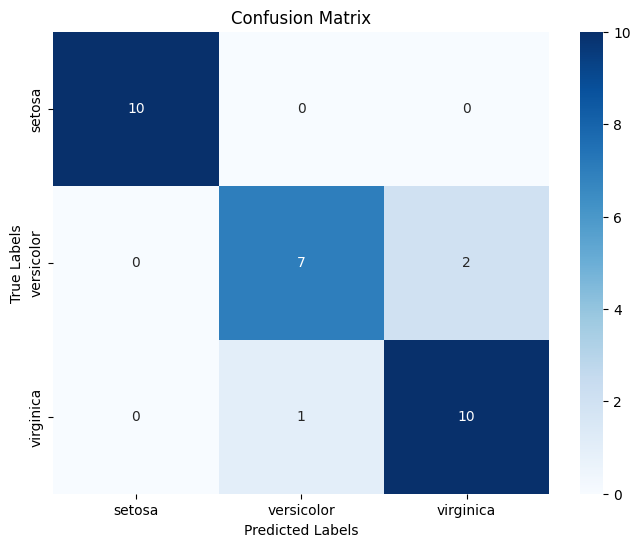

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Model performs very well only on two features selected by PCA algorithm. I got 90% accuracy.